In [2]:
import spark
import pyspark
from pyspark.sql import SparkSession

spark=SparkSession.builder\
.appName("Nicolas Cage vs Brad Pitt")\
.getOrCreate()

In [3]:
import os
import cv2
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

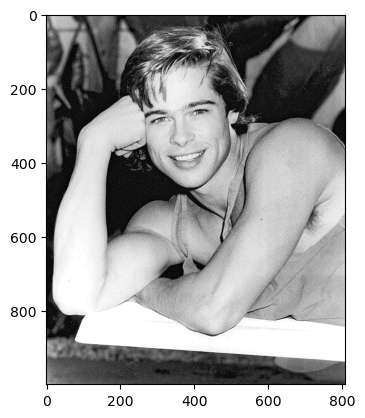

In [7]:
DATADIR=r'C:\Users\ldinisile\OneDrive - ADvTECH Ltd\Desktop\OneDrive - ADvTECH PTY LTD\PGD Data Analytics 2023\Programming\POE\Nicolas Cage vs Brad Pitt images\Training set'
CATEGORIES=['Brad','Nicolas']

for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [8]:
print(img_array)

[[154 122 119 ... 176 165 179]
 [135 152 159 ... 172 183 170]
 [140 140 140 ... 177 170 175]
 ...
 [184 203 204 ... 110  66  62]
 [222 218 185 ... 104  79  70]
 [239 209 190 ...  80  84  61]]


In [9]:
print(img_array.shape)

(1000, 808)


### CLEANING THE DATA TO ENSURE THAT ALL IMAGES ARE THE SAME WAY
This will be done in the following steps:
1.Face Detection<br>
2.Image Rotation<br>
3.Standardise Image Size<br>
4.Data Augmentation

In [10]:
#Face Detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_faces(img_array):
    gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    return faces

In [11]:
#Image Rotation
def align_face(img_array, face):
    (x, y, w, h) = face
    center = (x + w // 2, y + h // 2)
    angle = calculate_angle_of_face(face)  # Implement a function to calculate the angle
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))
    return rotated_img

In [12]:
#For Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

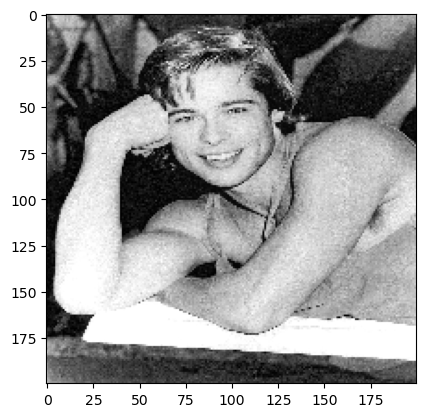

In [14]:
#Standardising Image Size(Resizing)
IMG_SIZE=200

new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [26]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        print(f"Processing category: {category}, class_num: {class_num}")
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

# AUGMENTATION,Specifying the number of augmented images per original image
augmented_images_per_original = 5 

# Creating a generator for augmented data
augmented_data_generator = datagen.flow(X, y, batch_size=32)

# Extract features (X) and labels (y) from training_data
X = np.array([features for features, _ in training_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array([label for _, label in training_data])

Processing category: Brad, class_num: 0
Processing category: Nicolas, class_num: 1


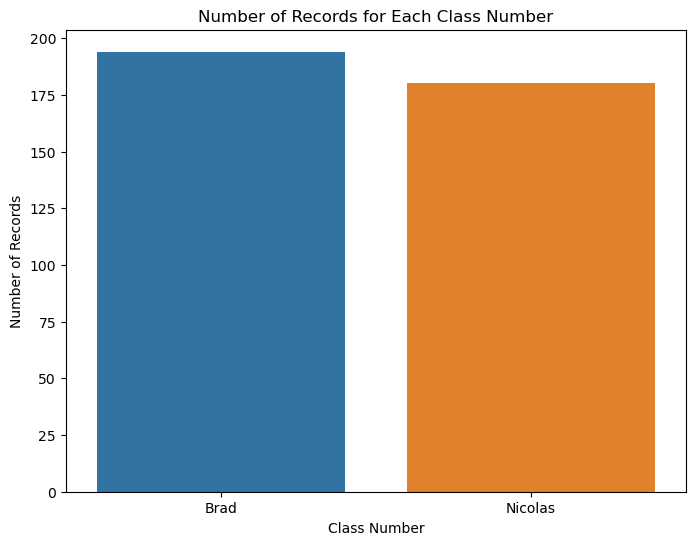

In [55]:
import seaborn as sns
class_counts = np.bincount(y)

# Visualize the counts using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(len(class_counts)), y=class_counts)
plt.xticks(np.arange(len(class_counts)), labels=CATEGORIES)
plt.xlabel('Class Number')
plt.ylabel('Number of Records')
plt.title('Number of Records for Each Class Number')
plt.show()

In [ ]:
print(len(training_data))

In [16]:
import random

random.shuffle(training_data)

In [17]:
for sample in training_data:
    print(sample[1])

1
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
1
1
0
1
1
1
1
1
0
1
0
0
1
0
1
0
1
0
1
1
1
1
0
1
0
0
0
0
1
1
1
1
1
0
0
1
1
1
0
1
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
1
0
1
1
0
0
1
1
0
0
0
0
0
0
0
1
1
0
1
1
0
0
0
0
1
1
0
0
0
0
1
1
1
0
0
0
1
0
0
1
1
0
1
1
0
1
0
1
0
1
1
0
0
1
1
1
0
1
1
0
0
1
1
1
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
0
1
0
1
1
1
1
0
1
0
1
0
0
0
1
0
1
1
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
1
0
1
1
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
0
0
1
0
1
1
1
1
0
0
0
0
0
1
0
0
0
0
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
0
0
0
1
0
0
0
1
0
1
0
1
0
1
0
1
0
0
0
0
1
1
1
1
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
1
0
0
1
0
0
0
1
0
0
0
1
1
1
1
1
0
0
1
0
0
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
0
0
1
1
0
0
1
0
1
1
0
0
1
0
1
1
1
1
0
1
0
0
0
0


In [18]:
# Extract features (X) and labels (y) from training_data
X = np.array([features for features, _ in training_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array([label for _, label in training_data])

In [19]:
#Saving my 
import pickle 

pickle_out=open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [20]:
pickle_in=open('X.pickle','rb')
X=pickle.load(pickle_in)

In [21]:
print(X.shape,y.shape)
print(X.dtype,y.dtype)

(374, 200, 200, 1) (374,)
uint8 int32


### CONSTRUCTING A MODEL<br>
The basic structure for a CNN model consists of the following steps:<br>
Convolution ->Pooling -> Convolution ->Pooling -> Fully Connected Layer -> Output

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D

In [23]:
#Normalising the data
X=X/255.0

In [24]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X,y,batch_size=32,validation_split=0.2,epochs=10)

Epoch 1/10
10/10 [==============================] - 13s 1s/step - loss: 0.9958 - accuracy: 0.4582 - val_loss: 0.6936 - val_accuracy: 0.4800
Epoch 2/10
10/10 [==============================] - 12s 1s/step - loss: 0.6858 - accuracy: 0.5284 - val_loss: 0.6918 - val_accuracy: 0.4800
Epoch 3/10
10/10 [==============================] - 13s 1s/step - loss: 0.6707 - accuracy: 0.6020 - val_loss: 0.6816 - val_accuracy: 0.5200
Epoch 4/10
10/10 [==============================] - 13s 1s/step - loss: 0.6211 - accuracy: 0.6890 - val_loss: 0.6697 - val_accuracy: 0.6400
Epoch 5/10
10/10 [==============================] - 13s 1s/step - loss: 0.5941 - accuracy: 0.6388 - val_loss: 0.6460 - val_accuracy: 0.6267
Epoch 6/10
10/10 [==============================] - 13s 1s/step - loss: 0.4994 - accuracy: 0.7759 - val_loss: 0.6489 - val_accuracy: 0.5867
Epoch 7/10
10/10 [==============================] - 13s 1s/step - loss: 0.4453 - accuracy: 0.7625 - val_loss: 0.6261 - val_accuracy: 0.6400
Epoch 8/10
10/10 [==

## RESULTS
As seen above, the model's training accuracy is 100% but the validation accuracy is at 67%, same comparison to the loss function being less in the trainng set as compared to the validation.
This means that the model is overfitting and can not generalise well on the validation set.<br>
**Below the model is optimised using TensorBoard as a Callback**

In [25]:
import time
import datetime
from tensorflow.keras.callbacks import TensorBoard

MODELNAME="Nicolas vs Brad training{}".format(int(time.time()))

tensorboard=TensorBoard(log_dir='logs{}'.format(MODELNAME))
log_dir = os.path.join(
    "logs",
    "fit",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)

model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X,y,batch_size=32,validation_split=0.1,epochs=10,callbacks=tensorboard)

Epoch 1/10
11/11 [==============================] - 11s 973ms/step - loss: 1.1592 - accuracy: 0.5476 - val_loss: 0.6884 - val_accuracy: 0.6316
Epoch 2/10
11/11 [==============================] - 12s 1s/step - loss: 0.6889 - accuracy: 0.5774 - val_loss: 0.7515 - val_accuracy: 0.3947
Epoch 3/10
11/11 [==============================] - 12s 1s/step - loss: 0.6511 - accuracy: 0.6071 - val_loss: 0.6649 - val_accuracy: 0.6316
Epoch 4/10
11/11 [==============================] - 13s 1s/step - loss: 0.5234 - accuracy: 0.7887 - val_loss: 0.6027 - val_accuracy: 0.6579
Epoch 5/10
11/11 [==============================] - 13s 1s/step - loss: 0.3365 - accuracy: 0.8780 - val_loss: 0.4901 - val_accuracy: 0.7368
Epoch 6/10
11/11 [==============================] - 14s 1s/step - loss: 0.2151 - accuracy: 0.9256 - val_loss: 0.5645 - val_accuracy: 0.7632
Epoch 7/10
11/11 [==============================] - 12s 1s/step - loss: 0.1397 - accuracy: 0.9732 - val_loss: 0.5052 - val_accuracy: 0.7632
Epoch 8/10
11/11 

In [51]:
pip install jupyter-tensorboard

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/66.4 kB ? eta -:--:--
     ---------------------------------------- 66.4/66.4 kB ? eta 0:00:00
  Created wheel for jupyter-tensorboard: filename=jupyter_tensorboard-0.2.0-py2.py3-none-any.whl size=15280 sha256=3fcbc1ea9b1423444c2661a35aab126a6692121d9627e699702100a8b00aa45d
  Stored in directory: c:\users\ldinisile\appdata\local\pip\cache\wheels\6a\e8\ee\64103cb21821f6a747a19b93a417b7e925857daab8ec5c7f50
Successfully built jupyter-tensorboard
Note: you may need to restart the kernel to use updated packages.


**ALTHOUGH THE MODEL IS STILL OVERFITTING, WITH A CALLBACK FUNCTION IT HAS PERFOMED BETTER, WITH A REDUCED LOSS FUNCTION AND A INCREASED ACCURACY ON VALIDATION.**
THE OVERFITTING CAN BE IMPROVED AND MODEL OPTIMISED BY CHANGING THE FOLLOWING:
-Optimisers<br>
-Learning Rate,<br>
-Dense Layers<br>
-Action functions etc<br>

### TESTING MODEL

In [48]:
from keras.preprocessing import image

# Load the image
img_path = 'pic1.jpg'
img = image.load_img(img_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = cv2.cvtColor(img_array.astype('uint8'), cv2.COLOR_BGR2GRAY)  # Convert to grayscale
img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img_array = np.expand_dims(img_array, axis=0)

# Make the prediction
result = model.predict(img_array)

# Get class indices
class_labels = ['Nicolas', 'Brad']

# Create a dictionary mapping class labels to indices
class_indices = {class_label: index for index, class_label in enumerate(class_labels)}

# Determine the predicted class
if result[0][0] >= 0.5:
    prediction = 'Nicolas'
else:
    prediction = 'Brad'

# Print the prediction
print(prediction)

1/1 [==============================] - 0s 27ms/step
Nicolas


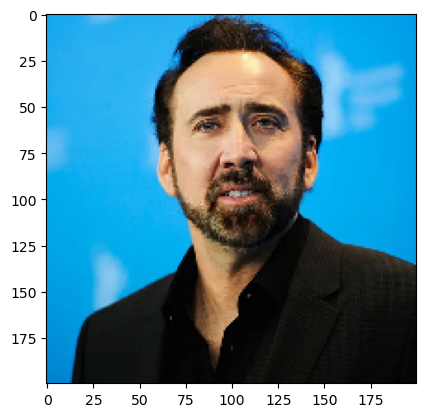

In [51]:
plt.imshow(img,cmap='gray')
plt.show()

In [58]:
# Load the image
img_path = 'pic2.jpg'
img1 = image.load_img(img_path, target_size=(200, 200))
img_array1= image.img_to_array(img1)
img_array1 = cv2.cvtColor(img_array1.astype('uint8'), cv2.COLOR_BGR2GRAY)  # Convert to grayscale
img_array1= cv2.resize(img_array1, (IMG_SIZE, IMG_SIZE))
img_array1= np.expand_dims(img_array1, axis=0)

# Make the prediction
result = model.predict(img_array1)

# Get class indices
class_labels = ['Nicolas', 'Brad']

# Create a dictionary mapping class labels to indices
class_indices = {class_label: index for index, class_label in enumerate(class_labels)}

# Determine the predicted class
if result[0][0] >= 0.5:
    prediction = 'Nicolas'
else:
    prediction = 'Brad'

# Print the prediction
print(prediction)

1/1 [==============================] - 0s 23ms/step
Brad


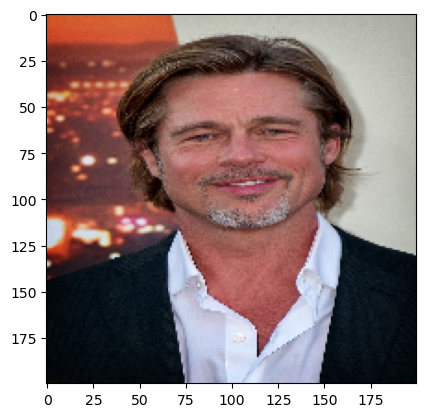

In [59]:
plt.imshow(img1,cmap='gray')
plt.show()

### As seen above, the model was able to classify both Nicolas Cage and Brad Pitt from Pictures that were not part of the training set.